### Complex Python Model

In [13]:
from dataclasses import dataclass    
import pandas as pd

In [2]:
@dataclass
class ModelInputs:
    starting_salary: int = 60000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.02
    promo_raise: float = 0.15
    savings_rate: float=0.25
    interest_rate: float= 0.05
    desired_cash: int = 1500000

model_data = ModelInputs()
model_data
    

ModelInputs(starting_salary=60000, promos_every_n_years=5, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.25, interest_rate=0.05, desired_cash=1500000)

In [14]:
data = model_data

## Salaries

In [3]:


def salary_at_year(data, year):
    num_promos = int(year/data.promos_every_n_years)
    
    
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)**year * (1+ data.promo_raise)**num_promos
    return salary_t



salary_at_year(model_data, 5)

76181.5754208

In [4]:
for i in range(6):
    year = i+1
    salary = salary_at_year(model_data, year)
    print('The salary at year', year,'is', salary)

The salary at year 1 is 61200.0
The salary at year 2 is 62424.0
The salary at year 3 is 63672.48000000001
The salary at year 4 is 64945.929599999996
The salary at year 5 is 76181.5754208
The salary at year 6 is 77705.206929216


## Wealth

In [5]:
def cash_saved_during_year(data,year):

    salary = salary_at_year(data,year)
    cash_saved = salary*data.savings_rate
    return cash_saved


cash_saved_during_year(model_data, 5)

19045.3938552

In [6]:
def wealth_at_year(data, year, prior_wealth):
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth*(1+data.interest_rate) + cash_saved
    return wealth

In [7]:
prior_wealth = 0

for i in range(6):
    year = i+1
    wealth = wealth_at_year(model_data, year, prior_wealth)
    print('the wealth at year', year, 'is',int(wealth))
    
    prior_wealth = wealth

the wealth at year 1 is 15300
the wealth at year 2 is 31671
the wealth at year 3 is 49172
the wealth at year 4 is 67867
the wealth at year 5 is 90306
the wealth at year 6 is 114248


In [8]:
### for comments

## Retirement 

In [9]:
def years_to_retirement(data):

    wealth=0
    prior_wealth = 0 
    year = 0
    print('Wealth over time')
    while wealth < data.desired_cash:
            year +=1
            wealth = wealth_at_year(data, year, prior_wealth)
            print('the wealth at year', year, 'is',int(wealth))
            prior_wealth = wealth
    
    print('\nRetirement:')  ###the backslash n means newline to tidy it up
    print('it will take', year,'years to retire')
    return year

In [12]:
ytr = years_to_retirement(model_data)

Wealth over time
the wealth at year 1 is 15300
the wealth at year 2 is 31671
the wealth at year 3 is 49172
the wealth at year 4 is 67867
the wealth at year 5 is 90306
the wealth at year 6 is 114248
the wealth at year 7 is 139775
the wealth at year 8 is 166975
the wealth at year 9 is 195939
the wealth at year 10 is 229918
the wealth at year 11 is 266079
the wealth at year 12 is 304542
the wealth at year 13 is 345431
the wealth at year 14 is 388878
the wealth at year 15 is 439025
the wealth at year 16 is 492294
the wealth at year 17 is 548852
the wealth at year 18 is 608878
the wealth at year 19 is 672556
the wealth at year 20 is 745168
the wealth at year 21 is 822190
the wealth at year 22 is 903858
the wealth at year 23 is 990421
the wealth at year 24 is 1082140
the wealth at year 25 is 1185745
the wealth at year 26 is 1295520
the wealth at year 27 is 1411793
the wealth at year 28 is 1534910

Retirement:
it will take 28 years to retire


# Results Summary

In [25]:
def get_salaries_wealths_df(data):

    wealth=0
    prior_wealth = 0 
    
    year = 0 
    
    df_data_tups = []
    
    while wealth < data.desired_cash:
        year +=1
        salary = salary_at_year(data, year)
        wealth = wealth_at_year(data, year, prior_wealth)
       
        prior_wealth = wealth
    
        df_data_tups.append((year, salary, wealth))
    
    
    df = pd.DataFrame(df_data_tups, columns = ['Year' , 'Salary', 'Wealth']  )     
    return df



In [24]:
df = get_salaries_wealths_df(model_data)
df

,Year,Salary,Wealth
0,1,61200.000000,1.530000e+04
1,2,62424.000000,3.167100e+04
2,3,63672.480000,4.917267e+04
3,4,64945.929600,6.786779e+04
4,5,76181.575421,9.030657e+04
5,6,77705.206929,1.142482e+05
6,7,79259.311068,1.397754e+05
7,8,80844.497289,1.669753e+05
8,9,82461.387235,1.959394e+05
9,10,96727.207227,2.299182e+05


In [27]:
def style_salaries_wealth(df):
    return df.style.format({
        'Salary': '${:,.0f}',
        'Welath': '${:,.0f}',
    }).bar(subset=['Salary','Wealth']).hide_index()
    

In [28]:
df = get_salaries_wealths_df(model_data)
style_salaries_wealth(df)

Year,Salary,Wealth
1,"$61,200",15300.000000
2,"$62,424",31671.000000
3,"$63,672",49172.670000
4,"$64,946",67867.785900
5,"$76,182",90306.569050
6,"$77,705",114248.199235
7,"$79,259",139775.436964
8,"$80,844",166975.333134
9,"$82,461",195939.446600
10,"$96,727",229918.220736


<AxesSubplot:xlabel='Year'>

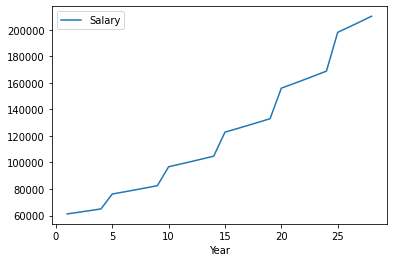

In [32]:
df.plot.line(x='Year', y= 'Salary')

<AxesSubplot:xlabel='Year'>

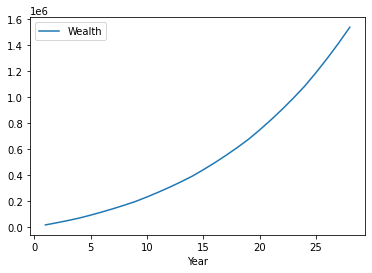

In [33]:
df.plot.line(x='Year', y= 'Wealth')